<a href="https://colab.research.google.com/github/NewburghCat/E-Commerce_Customer_Segmentation/blob/main/Mobile_PriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
# import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay


from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout


In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Data**

In [204]:
# Load Mobile Dataframe training data 
mobile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advance Machine Learning /Project 2 /train.csv')
mobile_df.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [205]:
# dataframe shape 

mobile_df.shape

(2000, 21)

In [206]:
#. data info 

mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**EDA**

In [207]:
# Identitfy duplicates 
mobile_df.duplicated().sum()

0

In [208]:
# Check for missing data
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [209]:
# checking for unique data 
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [210]:
# create a dtype filter to be used to count their values 
dtypes = mobile_df.dtypes
header_columns = dtypes[dtypes=='object'].index
header_columns

for all in header_columns:
  print(f'- column= {all}')
  print(df[all].value_counts(dropna=False))
  print('\n\n')

**Visualization**

Text(0.5, 1.0, 'Battery_Power - Int_Memory')

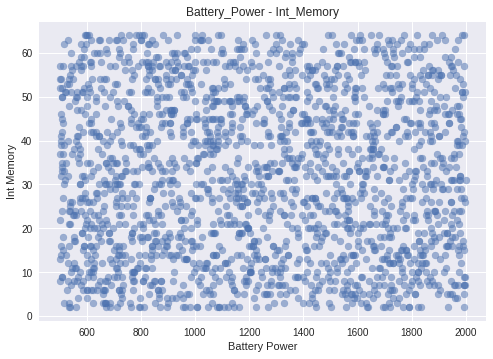

In [211]:
plt.scatter(mobile_df.battery_power, mobile_df.int_memory, alpha=0.5)
plt.xlabel('Battery Power')
plt.ylabel('Int Memory')
plt.title('Battery_Power - Int_Memory')

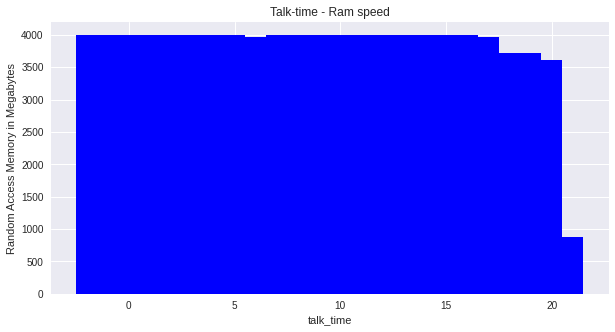

In [212]:
# create bar plot
fig = plt.figure(figsize = (10, 5))

plt.bar(mobile_df['fc'], mobile_df['ram'], color ='blue',
        width = 5)
 
plt.xlabel("talk_time")
plt.ylabel("Random Access Memory in Megabytes")
plt.title("Talk-time - Ram speed")
plt.show()

In [213]:
# ram unqiue values / int_memory column
numRam_range = mobile_df.groupby(['ram'])['int_memory'].nunique()

In [214]:
# this is a pandas Series
numRam_range

ram
256     1
258     2
259     1
262     1
263     1
       ..
3990    1
3991    2
3993    1
3996    1
3998    1
Name: int_memory, Length: 1562, dtype: int64

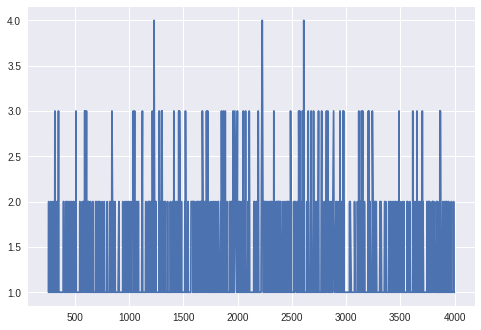

In [215]:
# Seaborn plot 

ram_range = list(numRam_range.index)
int_memory = list(numRam_range.values)

plt.style.use('seaborn')
plt.plot(ram_range, int_memory)

In [216]:
# Check statistic data 

mobile_df.describe().round(2)

battery_power    blue  clock_speed  dual_sim       fc   four_g  \
count        2000.00  2000.0      2000.00   2000.00  2000.00  2000.00   
mean         1238.52     0.5         1.52      0.51     4.31     0.52   
std           439.42     0.5         0.82      0.50     4.34     0.50   
min           501.00     0.0         0.50      0.00     0.00     0.00   
25%           851.75     0.0         0.70      0.00     1.00     0.00   
50%          1226.00     0.0         1.50      1.00     3.00     1.00   
75%          1615.25     1.0         2.20      1.00     7.00     1.00   
max          1998.00     1.0         3.00      1.00    19.00     1.00   

       int_memory    m_dep  mobile_wt  n_cores  ...  px_height  px_width  \
count     2000.00  2000.00    2000.00  2000.00  ...    2000.00   2000.00   
mean        32.05     0.50     140.25     4.52  ...     645.11   1251.52   
std         18.15     0.29      35.40     2.29  ...     443.78    432.20   
min          2.00     0.10      80.00     1.00  ...       0.00    500.00   
25%         16.00     0.20     109.00     3.00  ...     282.75    874.75   
50%         32.00     0.50     141.00     4.00  ...     564.00   1247.00   
75%         48.00     0.80     170.00     7.00  ...     947.25   1633.00   
max         64.00     1.00     200.00     8.00  ...    1960.00   1998.00   

           ram     sc_h     sc_w  talk_time  three_g  touch_screen     wifi  \
count  2000.00  2000.00  2000.00    2000.00  2000.00        2000.0  2000.00   
mean   2124.21    12.31     5.77      11.01     0.76           0.5     0.51   
std    1084.73     4.21     4.36       5.46     0.43           0.5     0.50   
min     256.00     5.00     0.00       2.00     0.00           0.0     0.00   
25%    1207.50     9.00     2.00       6.00     1.00           0.0     0.00   
50%    2146.50    12.00     5.00      11.00     1.00           1.0     1.00   
75%    3064.50    16.00     9.00      16.00     1.00           1.0     1.00   
max    3998.00    19.00    18.00      20.00     1.00           1.0     1.00   

       price_range  
count      2000.00  
mean          1.50  
std           1.12  
min           0.00  
25%           0.75  
50%           1.50  
75%           2.25  
max           3.00  

[8 rows x 21 columns]

<Figure size 1440x1080 with 0 Axes>

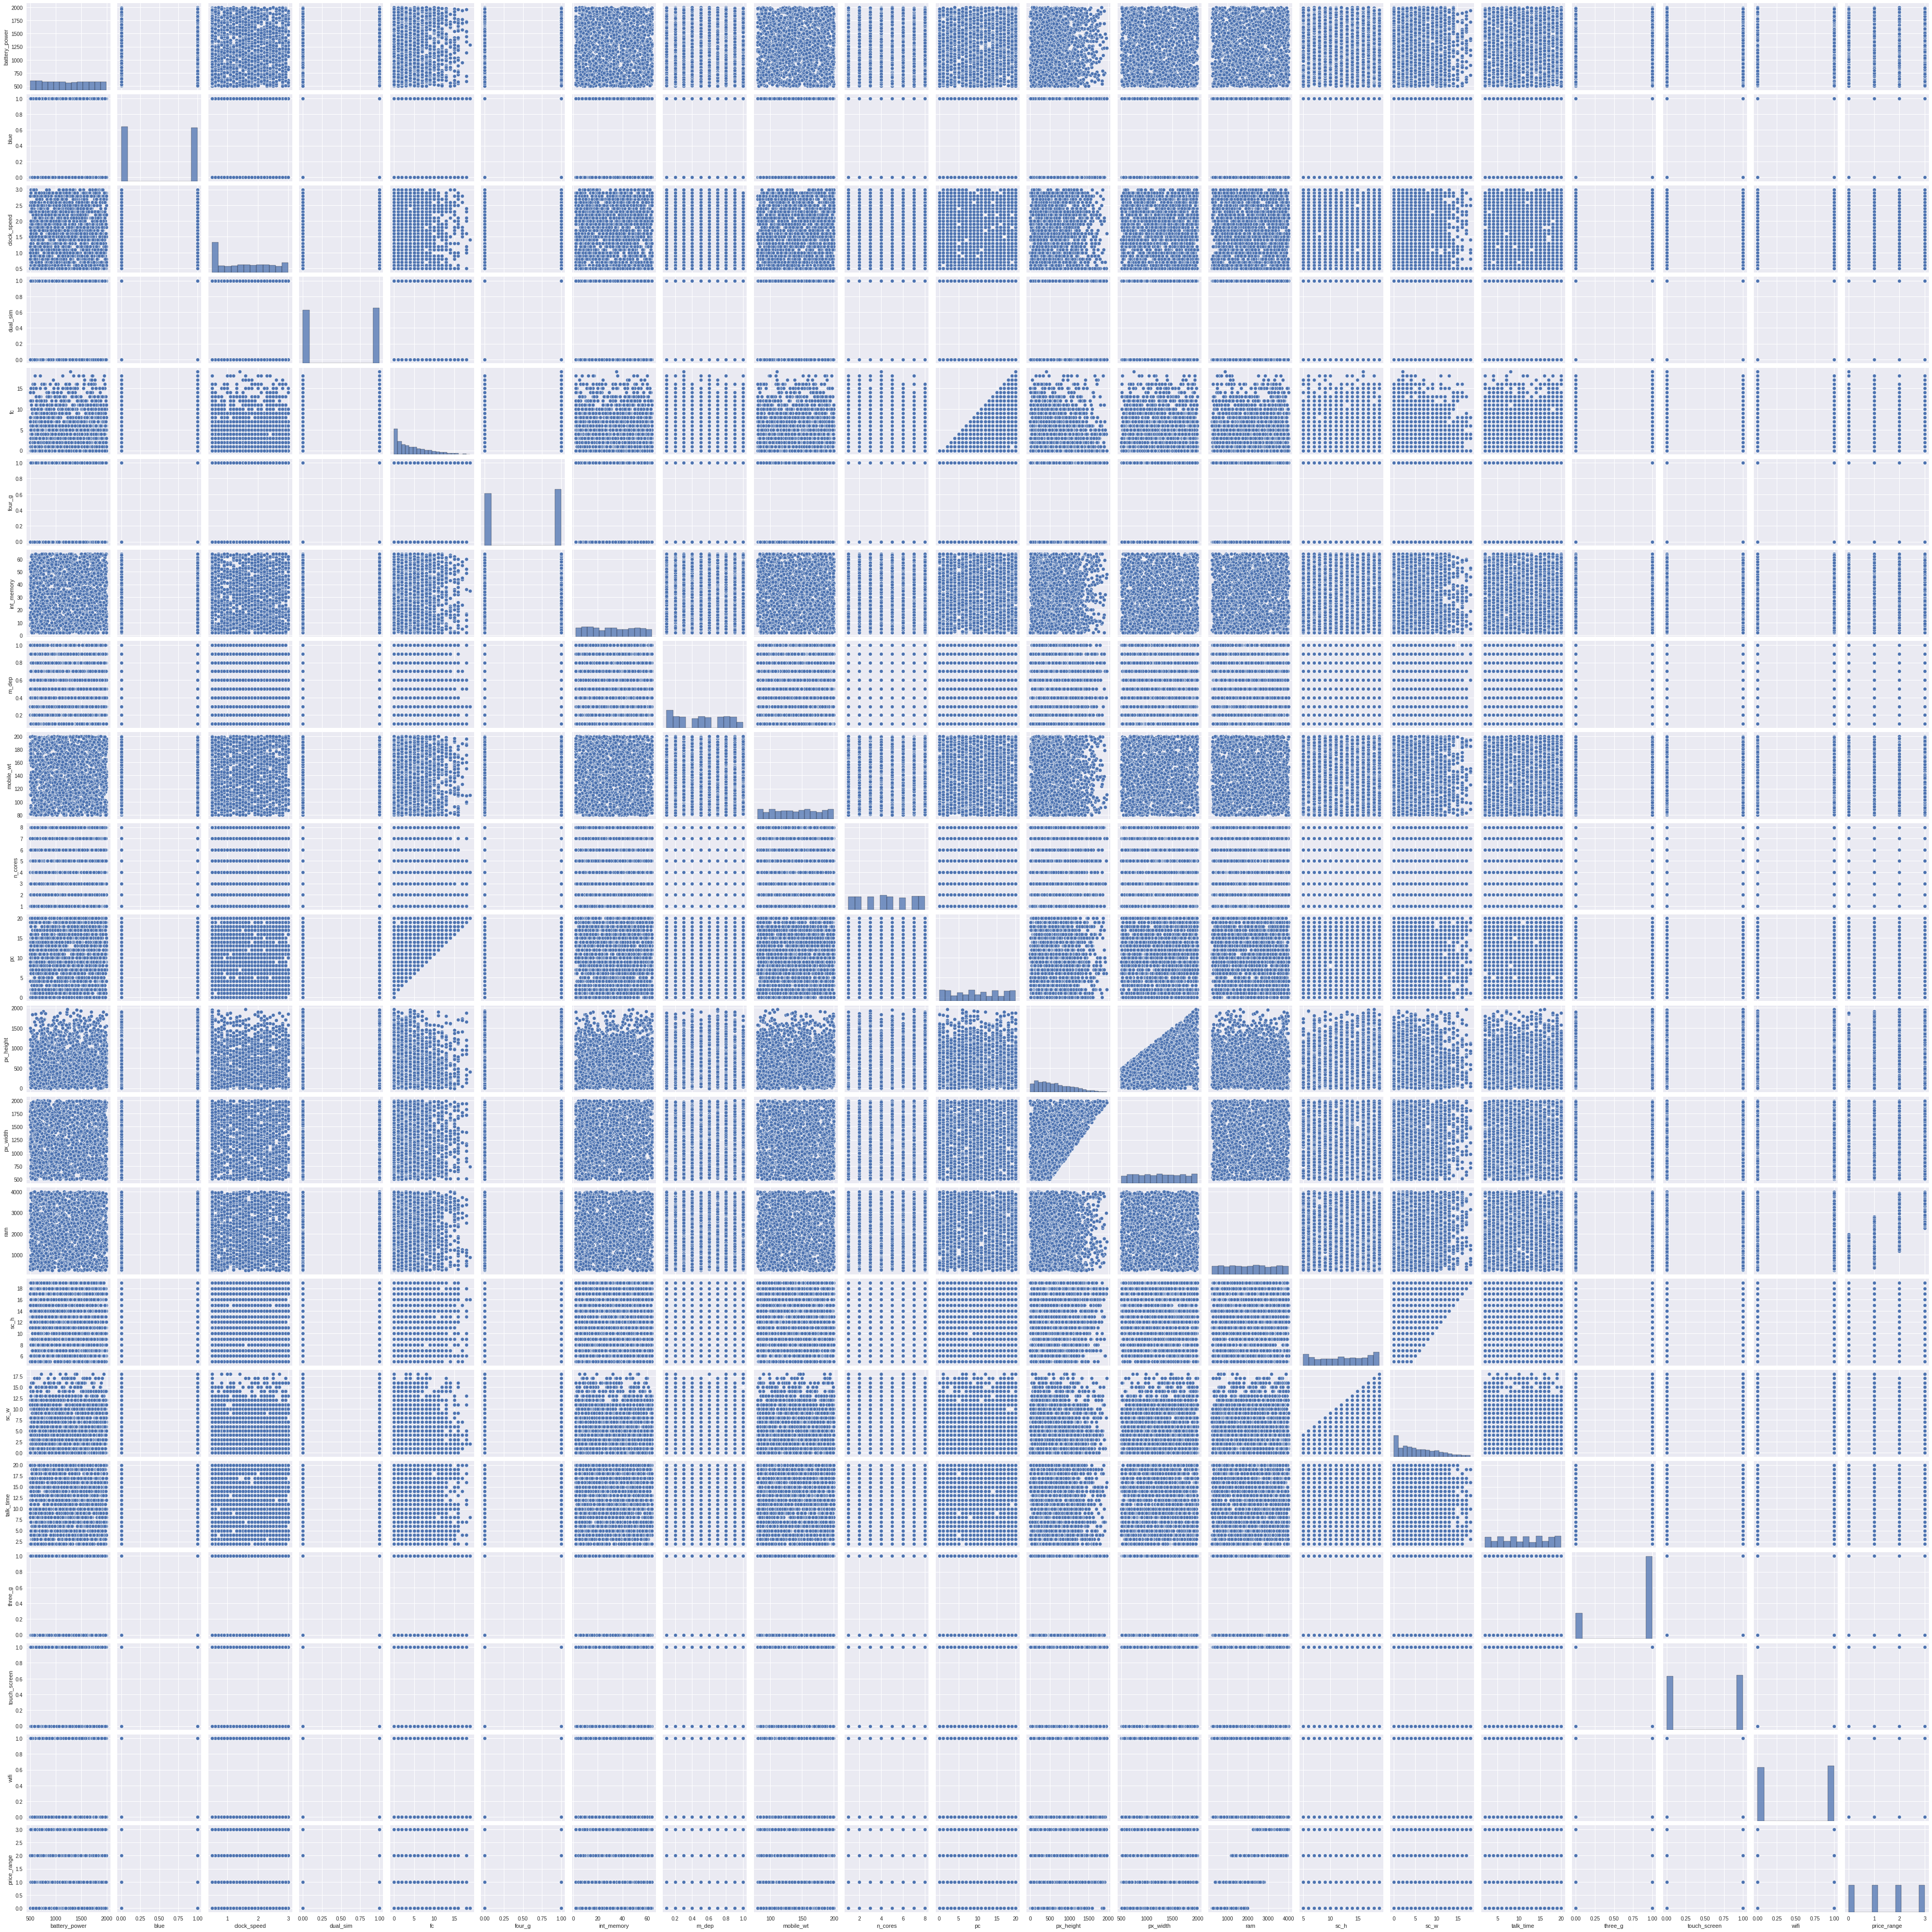

In [217]:
fig = plt.figure(figsize = (20, 15))

sns.pairplot(mobile_df);

# Preprocessing

In [218]:
#  Featured Matrix and Target Vector
y = mobile_df['price_range']
X = mobile_df.drop(columns = 'price_range')

# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [219]:
# Instantiate the categorical and numeric column selectors to select appropriate columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [220]:
# Instantiate the Standard Scaler and the One hot encoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [221]:
# Make tuples for preprocessing the categorical and numeric columns
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [222]:
# create column transformer 
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [223]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d8ad73110>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d8ad730d0>)])

In [224]:
X_train_processed = col_transformer.fit_transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [225]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

0         1         2         3         4         5         6   \
0 -1.651710 -0.984126 -0.753066  0.968496  2.460415  0.949284 -0.454504   
1 -1.357394  1.016130 -0.509092 -1.032529 -0.989195  0.949284 -1.390605   
2 -0.986103 -0.984126 -0.875053 -1.032529 -0.759221 -1.053425  0.096143   
3  1.268810 -0.984126 -1.241014  0.968496  0.390649 -1.053425  1.087309   
4 -1.124205 -0.984126  0.222829  0.968496 -0.989195  0.949284  0.041078   

         7         8         9         10        11        12        13  \
0  0.333786 -0.130677 -0.669214  1.343200 -0.618570  0.028575  0.234909   
1  1.378318  1.450771 -1.540208 -1.148308 -0.506253 -1.143163  1.360507   
2  0.333786 -1.486203  0.637277 -1.314409  1.391903  0.664330  1.408602   
3  1.378318 -0.582519  0.637277  0.014395 -1.218342  1.058776 -1.725869   
4 -0.014391 -1.006121 -0.233717 -1.314409  1.369440  1.650446  0.532726   

         14        15        16       17        18        19  
0  1.371934 -0.611770 -1.260437  0.55887 -1.006689 -0.997337  
1 -1.236907 -0.152713  1.469094  0.55887  0.993355  1.002670  
2  1.371934  1.224458 -0.350593  0.55887 -1.006689  1.002670  
3  0.423265  0.535873 -0.350593  0.55887 -1.006689 -0.997337  
4 -0.762572 -0.611770  1.469094  0.55887 -1.006689 -0.997337

#PCA 

In [226]:
# Data scaling 
scaler = StandardScaler()

# Fit & transform data 
scaled_df = scaler.fit_transform(X_train_df)

In [227]:
# Fit PCA (retaining 95% of the variance)

pca = PCA(n_components=.95)
pca.fit(scaled_df)

PCA(n_components=0.95)

# KNN Means

In [228]:
%%time
knn= KNeighborsClassifier()
knn_pca = make_pipeline(scaler, pca, knn)
knn_pca.fit(X_train, y_train)

CPU times: user 13.9 ms, sys: 9.04 ms, total: 23 ms
Wall time: 22.3 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [229]:
%%time
knn_pca.predict(X_test)

CPU times: user 70 ms, sys: 36.7 ms, total: 107 ms
Wall time: 106 ms


array([2, 1, 0, 2, 1, 1, 1, 0, 3, 1, 0, 1, 1, 3, 2, 2, 2, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 3, 0, 2, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0,
       3, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 2, 2, 1, 3, 0, 1, 0, 0, 3, 1, 3,
       3, 0, 3, 2, 3, 1, 2, 2, 1, 3, 0, 1, 0, 1, 1, 0, 0, 3, 2, 0, 2, 1,
       0, 1, 3, 2, 3, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 1, 1, 2, 0, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 3, 2, 1, 0, 1, 1, 2, 3, 3, 0, 2, 0,
       3, 3, 0, 2, 1, 0, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       3, 1, 1, 1, 0, 0, 2, 0, 3, 3, 2, 2, 0, 0, 0, 1, 1, 2, 3, 0, 3, 0,
       1, 0, 2, 1, 1, 3, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 0, 1, 3, 3, 0, 1, 2,
       1, 3, 0, 2, 1, 1, 3, 1, 1, 3, 0, 3, 3, 2, 3, 2, 1, 2, 3, 1, 3, 1,
       2, 0, 2, 0, 1, 3, 2, 1, 1, 2, 0, 1, 1, 2, 3, 1, 2, 1, 0, 3, 2, 3,
       1, 0, 3, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 3, 2,

In [230]:
# PCA with 2 components
pca7 = PCA(n_components=2)

In [231]:
# PCA with 95% explained variance
pca85 = PCA(n_components=.95)

In [232]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [233]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=2))

In [234]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('logisticregression', LogisticRegression())])

In [235]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.286
Testing accuracy: 0.272


# 

In [236]:
# creating parameter dictionary to use in GridSearchCV object

param_grid = {
    "kneighborsclassifier__n_neighbors": range(1,10),
    "kneighborsclassifier__p": range(1,5),
    "kneighborsclassifier__weights": ['distance', 'uniform']
}


In [237]:
%%time
# putting the knn pipeline and parameter grid inside the GridSearch
knn_pipe_gs = GridSearchCV(knn_pca, param_grid)

# fitting on the training data
knn_pipe_gs.fit(X_train_processed, y_train)

# printing the results for the best parameters. 
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 3, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.264
CPU times: user 1min 44s, sys: 25 s, total: 2min 9s
Wall time: 1min 42s


# Confusion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


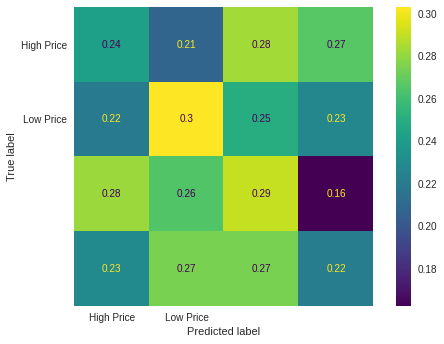

In [238]:
# Creatin labels for use on a confusion matrix 
labels = ['High Price', 'Low Price']

# Creating confusion matrix for best KNN model
plot_confusion_matrix(estimator=best_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);